<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Борьба-с-дисбалансом-методом-&quot;Взвешивание-классов&quot;" data-toc-modified-id="Борьба-с-дисбалансом-методом-&quot;Взвешивание-классов&quot;-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Борьба с дисбалансом методом "Взвешивание классов"</a></span></li><li><span><a href="#Борьба-с-дисбалансом-методом-&quot;upsampling&quot;" data-toc-modified-id="Борьба-с-дисбалансом-методом-&quot;upsampling&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Борьба с дисбалансом методом "upsampling"</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [55]:
# импортируем библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [56]:
# прочитаем данные из файла
# и сохраним в переменной df
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    print('Проверь путь файла')
# выведем первые 5 строк таблицы
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [57]:
df.info() # выведем общую информацию методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Признаки**

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента

In [58]:
# выведем характерные значения методом describe()
df.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [59]:
# заменим пропуски в столбце Tenure на медиану с помощью метода fillna() и median()
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
# выполним проверку с помощью метода shape
df['Tenure'].shape[0]

10000

In [60]:
# удалим столбцы, которые не потребуются для обучения модели
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Преобразуем категориальные признаки в численные с помощью прямого кодирования техникой OHE.

In [61]:
# под кодирование попадают два столбца- Gender и Geography
# в столбце Gender удалим первый столбец, чтобы избежать дамми-ловушки
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)
# в столбце Geography удалять столбец не нужно, перезапишем данные в df
df = pd.get_dummies(df, columns = ['Geography'], drop_first=True)
display(df)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2.0,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8.0,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2.0,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5.0,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10.0,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7.0,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3.0,75075.31,2,1,0,92888.52,1,1,0


Данные готовы к исследованию.

## Исследование задачи

Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разобьем в соотношении 3:1:1

In [62]:
# используем функцию train_test_split для df, чтобы разделить на 2 части, учитывая соотношение классов
df_train, df = train_test_split(df, test_size=0.4, random_state=12345, stratify = df['Exited'])
    
# вторую часть делим на тестовую и валидационную
df_valid, df_test = train_test_split(df, test_size=0.5, random_state=12345, stratify = df['Exited'])    

In [63]:
# проверим размеры выборок
print(
    df_train.shape, 
    df_valid.shape,
    df_test.shape
)

(6000, 12) (2000, 12) (2000, 12)


Выборки созданы. Теперь разделим их на признаки и целевой признак.

In [64]:
features_train = df_train.drop('Exited', axis =1 )
target_train = df_train['Exited']
features_valid =df_valid.drop('Exited', axis =1 )
target_valid= df_valid['Exited']

In [65]:
# создадим признаки для тестовой выборки
features_test = df_test.drop('Exited', axis = 1)
# создадим цель
target_test = df_test['Exited']

Все столбцы содержат числовые значения, можем приступать к стандартизации данных

In [66]:
numeric = ['CreditScore', 'Geography_Germany','Geography_Spain', 'Gender', 'Age', 'Tenure', 
           'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary' 
]
# выполним стандартизацию данных структурой StandardScaler()
scaler = StandardScaler()
# обучим на тренировочной части данных
scaler.fit(features_train)
# применим функцию transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Исследуем баланс классов.

In [67]:
print(target_train.value_counts())

0    4778
1    1222
Name: Exited, dtype: int64


Распределение 1 к 4.
Если не учитывать эти данные, то модель будет перегружена большим классом(нулями), в следствии будет игнорировать меньший класс(единицы).
Модели может не хватить примеров и свойств редкого класса.

Сначала обучим модель без учета дисбаланса, в следующем разделе примем во внимание дисбаланс и сравним результаты.

Оценивать качество модели будем с помощью F1 меры, которая является средним гармоническим полноты и точности.

Единица в F1 означает, что соотношение полноты и точности равно 1:1.

Когда полнота и точность близки к нулю, то к 0 приближается и само среднее гармоническое.

Чтобы выявить, как сильно наша модель отличается от случайной,
посчитаем AUC-ROC. 
Это метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0,5.

In [68]:
%%time
best_model_1 = None
best_result = 0
best_depth = 0
# сделаем цикл для max_depth от 1 до 12
for depth in range(1, 12):
    # создадим модель, указав max_depth=depth
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth= depth)
    # обучим модель
    model_tree.fit(features_train, target_train) 
    # найдём предсказания на валидационной выборке
    predictions_valid = model_tree.predict(features_valid)
    
# найдем значение F1 меры
    result = f1_score(target_valid, predictions_valid)
# выберем лучшую модель с лучшим результатом    
    if result > best_result:
            best_model_1 = model_tree
            best_result = result
            best_depth = depth
# вычислим вероятность классов функцией predict_proba()
probabilities_valid = best_model_1.predict_proba(features_valid)
# выделим вероятность положительного класса
probabilities_one_valid = probabilities_valid[:, 1]
# для подсчета метрики AUC-ROC используем функцию roc_auc_score()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    
print('F1 мера = ', best_result,'max_debt = ', best_depth )
print('AUC-ROC = ', auc_roc)

F1 мера =  0.5936599423631124 max_debt =  7
AUC-ROC =  0.8248880739481723
CPU times: user 194 ms, sys: 7.81 ms, total: 202 ms
Wall time: 207 ms


In [69]:
%%time
best_model_2 = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 15):
        # инициализируем модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        # обучим модель на тренировочной выборке
        model_forest.fit(features_train, target_train) 
         # получим предсказания модели на валидационной выборке
        predictions_valid = model_forest.predict(features_valid)
        # сохраним Accuracy в переменную result
        result = f1_score(target_valid, predictions_valid)
        # отберем лучшие результаты
        if result > best_result:
            best_model_2 = model_forest
            best_result = result
            best_est = est
            best_depth = depth
            
# вычислим вероятность классов функцией predict_proba()
# выделим вероятность положительного класса
# для подсчета метрики AUC-ROC используем функцию roc_auc_score()
            
probabilities_valid = best_model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
print("F1 мера случайного леса на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('AUC-ROC = ', auc_roc)

F1 мера случайного леса на валидационной выборке: 0.6120058565153733 Количество деревьев: 30 Максимальная глубина: 14
AUC-ROC =  0.8571118459946793
CPU times: user 10.2 s, sys: 31.9 ms, total: 10.2 s
Wall time: 10.2 s


In [70]:
# создадим модель логистической регрессии с параметрами solver='liblinear'
# Гиперпараметром max_iter задаётся максимальное количество итераций обучения.
model_log_reg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
# обучим модель
model_log_reg.fit(features_train, target_train)
# получим предсказание модели на валидационной выборке
predictions_valid = model_log_reg.predict(features_valid)

# вычислим вероятность классов функцией predict_proba()
# выделим вероятность положительного класса
# для подсчета метрики AUC-ROC используем функцию roc_auc_score()

probabilities_valid = model_log_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 мера =', f1_score(target_valid, predictions_valid))
print('AUC-ROC = ', auc_roc)

F1 мера = 0.0
AUC-ROC =  0.47889262488915163


**Вывод**

Исследовали 3 модели.

Лучший показать F1 меры у модели случайного леса, составляет 0,612. AUC-ROC 0,8571.
Данные показатели больше 0,5, что говорит о том, что она лучше случайной модели.

## Борьба с дисбалансом

### Борьба с дисбалансом методом "Взвешивание классов"

В методе "Взвешивание классов" редкому классу присваивается больший вес. В нашем случае должен быть вес класса "0" = 1, вес класса "1" = 4. 

Если указать `class_weight='balanced'` , алгоритм посчитает, во сколько раз
класс «0» встречается чаще класса «1».

In [71]:
# создадим модель логистической регрессии с параметрами solver='liblinear'
# Гиперпараметром max_iter задаётся максимальное количество итераций обучения.
model_log_reg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced')
# обучим модель
model_log_reg.fit(features_train, target_train)
# получим предсказание модели на валидационной выборке
predictions_valid = model_log_reg.predict(features_valid)

# вычислим вероятность классов функцией predict_proba()
# выделим вероятность положительного класса
# для подсчета метрики AUC-ROC используем функцию roc_auc_score()

probabilities_valid = model_log_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 мера =', f1_score(target_valid, predictions_valid))
print('AUC-ROC = ', auc_roc)

F1 мера = 0.36621534493874913
AUC-ROC =  0.6023453665385753


После "взвешивания классов" модель логистической регрессии значительно улучшилась, F1 мера увеличилась с 0 до 0,36 

In [72]:
%%time
best_model_1 = None
best_result = 0
best_depth = 0
# сделаем цикл для max_depth от 1 до 15
for depth in range(1, 15):
    # создадим модель, указав max_depth=depth
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth= depth, class_weight='balanced')
    # обучим модель
    model_tree.fit(features_train, target_train) 
    # найдём предсказания на валидационной выборке
    predictions_valid = model_tree.predict(features_valid)
    

    result = f1_score(target_valid, predictions_valid)
    
    if result > best_result:
            best_model_1 = model_tree
            best_result = result
            best_depth = depth

# вычислим вероятность классов функцией predict_proba()
# выделим вероятность положительного класса
# для подсчета метрики AUC-ROC используем функцию roc_auc_score()

probabilities_valid = best_model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    
print('F1 мера = ', best_result,'max_debt = ', best_depth )
print('AUC-ROC = ', auc_roc)

F1 мера =  0.575925925925926 max_debt =  6
AUC-ROC =  0.8233269595526653
CPU times: user 348 ms, sys: 28.1 ms, total: 377 ms
Wall time: 441 ms


После "взвешивания классов" модель решаюшего дерева незначительно ухудшилась, F1 мера уменьшилась с 0,59 до 0,57

In [73]:
%%time
best_model_2 = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 15):
        # инициализируем модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        # обучим модель на тренировочной выборке
        model_forest.fit(features_train, target_train) 
         # получим предсказания модели на валидационной выборке
        predictions_valid = model_forest.predict(features_valid)
        # сохраним F1 меру в переменную result
        result = f1_score(target_valid, predictions_valid)
        # отберем лучшие результаты
        if result > best_result:
            best_model_2 = model_forest
            best_result = result
            best_est = est
            best_depth = depth

# вычислим вероятность классов функцией predict_proba()
# выделим вероятность положительного класса
# для подсчета метрики AUC-ROC используем функцию roc_auc_score()
            
probabilities_valid = best_model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
print("F1 мера случайного леса на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('AUC-ROC = ', auc_roc)

F1 мера случайного леса на валидационной выборке: 0.6465324384787472 Количество деревьев: 50 Максимальная глубина: 14
AUC-ROC =  0.8719639865996649
CPU times: user 10 s, sys: 43.9 ms, total: 10.1 s
Wall time: 10.1 s


После "взвешивания классов" модель случайного леса  улучшилась, F1 мера увеличилась с 0,61 до 0,64 

### Борьба с дисбалансом методом "upsampling"

Сбалансируем классы путём увеличения числа объектов меньшего класса, обучим модели.

Преобразование проходит в несколько этапов:
* Разделить обучающую выборку на объекты по классам;
* Определить тот класс, который содержит меньше объектов. Назовём его меньшим классом;
* Скопировать несколько раз объекты меньшего класса;
* С учётом полученных данных создать новую обучающую выборку, Чтобы соединить таблицы, используется функция `pd.concat()`.   Она на вход получает список таблиц, которые нужно соединить.;
* Перемешать данные- метод `shuffle`.

In [74]:
# функция upsample():
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
# используем функцию pd.concat() для соединения таблиц
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
# методом shuffle перемешаем данные  
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
# применим функцию upsemple к обучающей выборке увеличик кол-во единиц в 4 раза
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


In [75]:
model_3_up = LogisticRegression(random_state = 12345, solver='liblinear')
model_3_up.fit(features_upsampled, target_upsampled) 
predicted_valid = model_3_up.predict(features_valid)

probabilities_valid = model_3_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('F1 мера =', f1_score(target_valid, predictions_valid))
print('AUC-ROC = ', auc_roc)

F1 мера = 0.5977337110481588
AUC-ROC =  0.5842047246034092


После применения метода "upsempling" в логистической регрессии F1 мера увеличилась до 0,59 по сравнению с предыдущими вариантами 0,36 и 0 соотвественно.

In [76]:
best_model_1_up = None
best_result = 0
best_depth = 0
# сделаем цикл для max_depth от 1 до 15
for depth in range(1, 15):
    # создадим модель, указав max_depth=depth
    model_tree_up = DecisionTreeClassifier(random_state=12345, max_depth= depth)
    # обучим модель
    model_tree_up.fit(features_upsampled, target_upsampled) 
    # найдём предсказания на валидационной выборке
    predictions_valid = model_tree_up.predict(features_valid)
    

    result = f1_score(target_valid, predictions_valid)
    
    if result > best_result:
            best_model_1_up = model_tree_up
            best_result = result
            best_depth = depth

probabilities_valid = best_model_1_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    
print('F1 мера = ', best_result,'max_debt = ', best_depth )
print('AUC-ROC = ', auc_roc)

F1 мера =  0.575925925925926 max_debt =  6
AUC-ROC =  0.8233423551581437


После применения метода "upsempling" решающее дерево ухудшило результат по F1 мере до 0,57 по сравнению с педыдущими 0,57 и 0,59 соответственно.

In [77]:
%%time
best_model_2_up = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 15):
        # инициализируем модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
        model_forest_up = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        # обучим модель на тренировочной выборке
        model_forest_up.fit(features_upsampled, target_upsampled) 
         # получим предсказания модели на валидационной выборке
        predictions_valid = model_forest_up.predict(features_valid)
        # сохраним Accuracy в переменную result
        result = f1_score(target_valid, predictions_valid)
        # отберем лучшие результаты
        if result > best_result:
            best_model_2_up = model_forest_up
            best_result = result
            best_est = est
            best_depth = depth
            
probabilities_valid = best_model_2_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
print("F1 мера случайного леса на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)
print('AUC-ROC = ', auc_roc)

F1 мера случайного леса на валидационной выборке: 0.6513233601841196 Количество деревьев: 50 Максимальная глубина: 14
AUC-ROC =  0.8658596290274904
CPU times: user 14 s, sys: 43.5 ms, total: 14 s
Wall time: 14.1 s


После применения метода "upsempling" случайный лес показал первый результат по F1 мере до 0,65 по сравнению с педыдущими 0,64 и 0,62 соответственно.

Лучшая модель при применении "взешивании классов" -случайный лес best_model_2 с результатом F1 меры 0,6465, количество деревьев 50, глубина 14.

Лучшая модель при "увеличении выборки"- случайный лес  best_model_2_up с результатом F1 меры 0,6513, количество деревьев 50, глубина 14.

Проверим обе на тестовой выборке.

## Тестирование модели

In [78]:
# получим предсказание модели на тестовой выборке
predictions_test = best_model_2.predict(features_test)
print('F1 мера на тестовой выборке =', f1_score(target_test, predictions_test))
            
probabilities_test = best_model_2.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC = ', auc_roc_test)

F1 мера на тестовой выборке = 0.609090909090909
AUC-ROC =  0.8532692939472599


Для наглядного представления работы модели построим матрицу ошибок, в которой по главной диагонали(от верхнего левого угла) располагаются правильные прогнозы, а вне главной диагонали- ошибочные варианты.

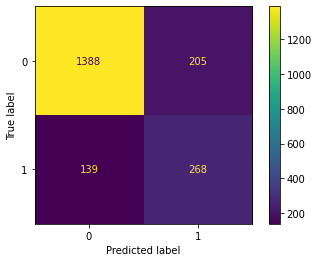

In [79]:
# построим матрицу ошибок 
matrix = confusion_matrix(target_test,predictions_test)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()

1388- количество правильно предсказанных значений класса 0, т.е. столкько клиентов осталось и модель это правильно предсказала. 

139- столько значений класса 1 было предсказанно неправильно, т.е. 139 клиентов фактически ушли, а модель рассчитала, что они остались.

205- количество фактически оставшихся клиентов, но модель предсказала, что они ушли.

268- человек фактически ушли и модель правильно предсказала их уход.

Целевой показатель достигнут. Возьмем вторую модель для проверки на тестовой выборке.

In [80]:
# # получим предсказание модели на тестовой выборке
predictions_test = best_model_2_up.predict(features_test)
print('F1 мера на тестовой выборке =', f1_score(target_test, predictions_test))
            
probabilities_test = best_model_2_up.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC = ', auc_roc_test)

F1 мера на тестовой выборке = 0.6021003500583432
AUC-ROC =  0.8483938483938483


Целевое значение достигнуто и составило 0,6021.
Значение AUC-ROC 0.84 , что является высоким показателем.

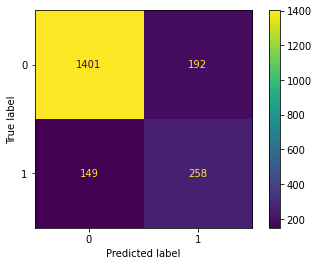

In [81]:
matrix = confusion_matrix(target_test,predictions_test)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()

1401 - количество правильно предсказанных значений класса 0, т.е. столкько клиентов осталось и модель это правильно предсказала. 

149- столько значений класса 1 было предсказанно неправильно, т.е. 149 клиентов фактически ушли, а модель рассчитала, что они остались.

192- количество фактически оставшихся клиентов, но модель предсказала, что они ушли.

258- человек фактически ушли и модель правильно предсказала их уход.

**Итоговый вывод**

  Наша цель была обучить модель, которая предсказывала бы уход клиента из банка, с целевым показателем F1 меры не менее 0,59
  
  В результате лучшей моделью на тестовой выборке является модель "случайного леса", которая учитывает дисбаланс с помощью взвешивания классов. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*